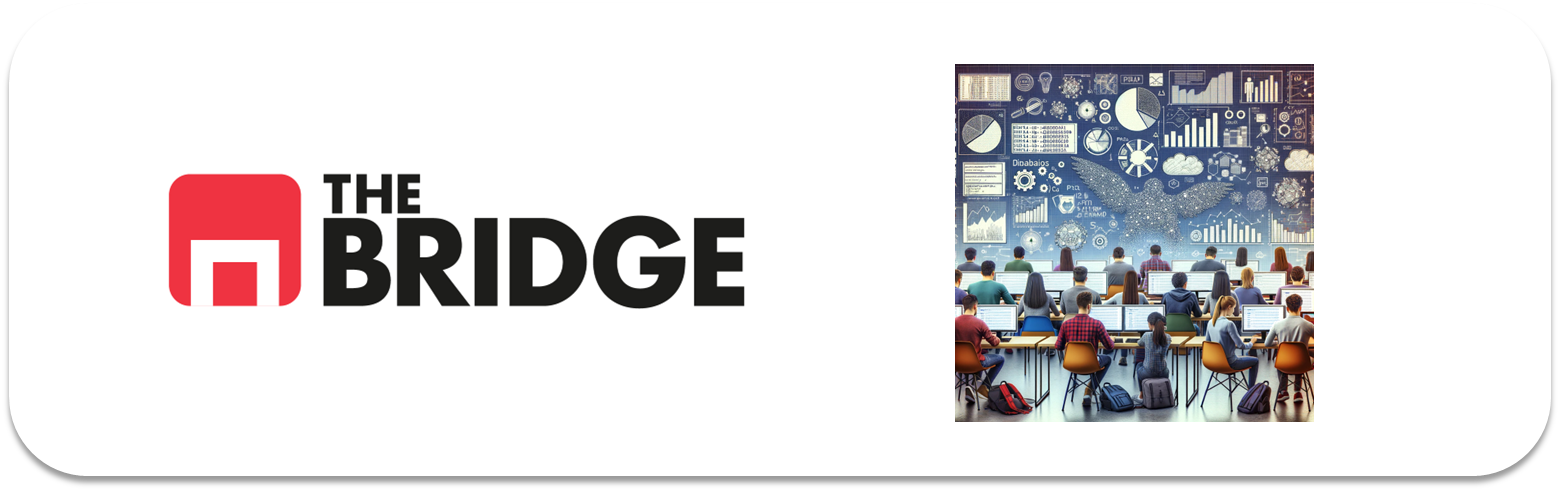

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [4]:
import pandas as pd

# Cargamos el dataset. Con una visualización previa, vemos que el delimitador es '|'
file_path = './data/hard_to_find/obligatoria_hard.csv'
data = pd.read_csv(file_path, delimiter='|')

# Mostramos las primeras filas del dataset para entender su estructura
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


La variable MEDV parece ser un buen candidato para el target, ya que representa el valor medio de las viviendas ocupadas.

Voy a realizar un análisis gráfico inicial de la variable target MEDV para confirmar su idoneidad. 

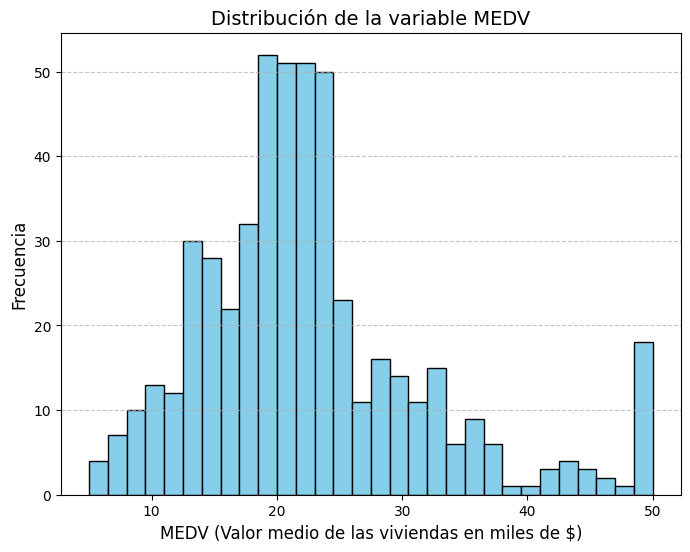

In [5]:
import matplotlib.pyplot as plt

# Analizamos la variable target (MEDV)
plt.figure(figsize=(8, 6))
plt.hist(data['MEDV'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable MEDV', fontsize=14)
plt.xlabel('MEDV (Valor medio de las viviendas en miles de $)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


La distribución de la variable MEDV muestra que es continua y tiene un rango adecuado para un modelo de regresión. Ahora procederé a dividir los datos en conjuntos de entrenamiento y prueba, y luego realizaré un análisis exploratorio para seleccionar las características más relevantes.

In [7]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en features (X) y target (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Dividimos los datos en training y testing. Pongo random_state=27 para que sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Mostramos las formas de los training y testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 12), (102, 12), (404,), (102,))

Los datos se han dividido exitosamente:

Conjunto de entrenamiento: 404 muestras.
Conjunto de prueba: 102 muestras.

Ahora realizaré un análisis exploratorio para determinar qué características serán más útiles para el modelo.

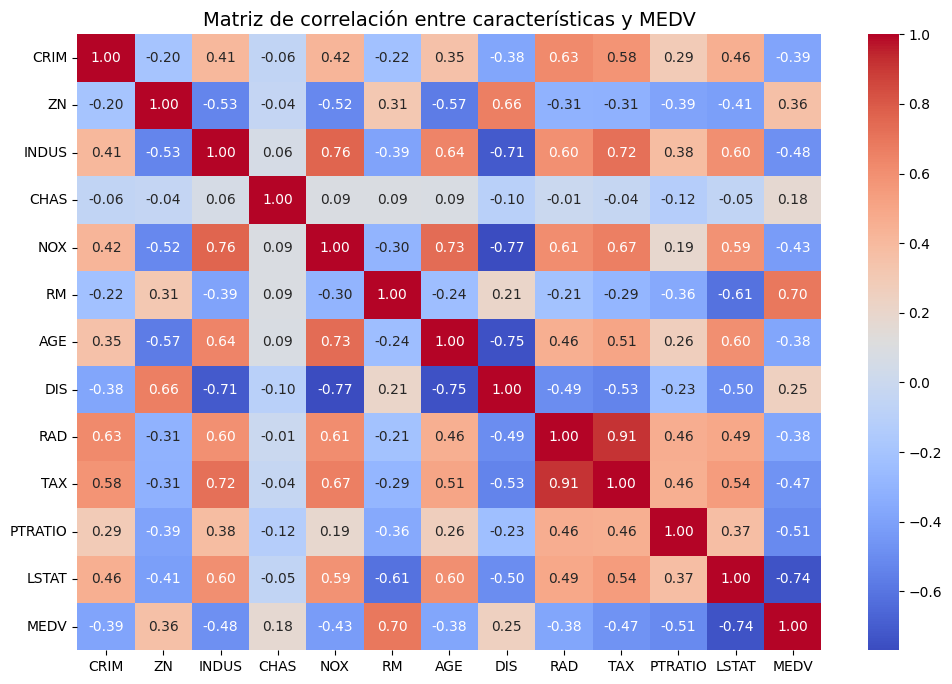

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [8]:
import seaborn as sns

# Visualizamos las correlaciones entre las features y el target (variable MEDV)
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre características y MEDV", fontsize=14)
plt.show()

# Correlaciones con la variable MEDV
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
correlation_with_medv


El análisis de correlación muestra que las siguientes características tienen la mayor relación con MEDV:

**Positivas (correlación alta):**

RM (número promedio de habitaciones por vivienda): 0.70.

ZN (proporción de terreno residencial): 0.36.

DIS (distancias ponderadas a centros de empleo): 0.25.

**Negativas (correlación alta):**

LSTAT (% de población de bajo estatus socioeconómico): -0.74.

PTRATIO (relación alumno-maestro): -0.51.

INDUS, TAX, y NOX también tienen correlaciones moderadas-negativas con MEDV.

Procederé a normalizar las características seleccionadas para preparar el modelo.

In [9]:
from sklearn.preprocessing import StandardScaler

# Selección de características en función de la matriz de correlación
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'NOX', 'DIS', 'TAX']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Normalizamos las características seleccionadas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Mostramos las primeras filas de las características normalizadas
pd.DataFrame(X_train_scaled, columns=selected_features).head()


,RM,LSTAT,PTRATIO,NOX,DIS,TAX
0,2.178216,-1.517267,-1.708405,0.457797,-0.846232,-0.015601
1,-0.231034,-0.505632,1.191190,0.180241,-0.730290,-0.794447
2,0.054008,-0.220227,-1.708405,0.457797,-0.818374,-0.015601
3,-0.170874,1.616540,0.822987,0.275651,-0.768577,1.560065
4,-1.256612,1.599586,0.086582,-0.548341,-0.083165,-0.770482


Ahora procederé a construir un modelo de regresión lineal y evaluarlo utilizando métricas como MAE, RMSE, MSE, y $R^2$

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inicializamos el modelo de regresión lineal y lo entrenamos
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Hacemos predicciones sobre el conjunto de testing
y_pred = linear_model.predict(X_test_scaled)

# Evaluamos el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostramos las métricas de evaluación
mae, mse, rmse, r2


(3.6739624167831226, 28.56433282240087, 5.344561050488699, 0.6847280008054752)

El modelo de regresión lineal ha sido evaluado con las siguientes métricas:

**MAE (Error absoluto medio):** 3.67

**MSE (Error cuadrático medio):** 28.56

**RMSE (Raíz del error cuadrático medio):** 5.34

**$R^2$ (Coeficiente de determinación):** 0.68

Estas métricas indican un rendimiento razonable, pero podría mejorarse. Ahora, procederé a comparar gráficamente las predicciones con los valores reales y luego implementaré una regularización para explorar si se puede mejorar el modelo.

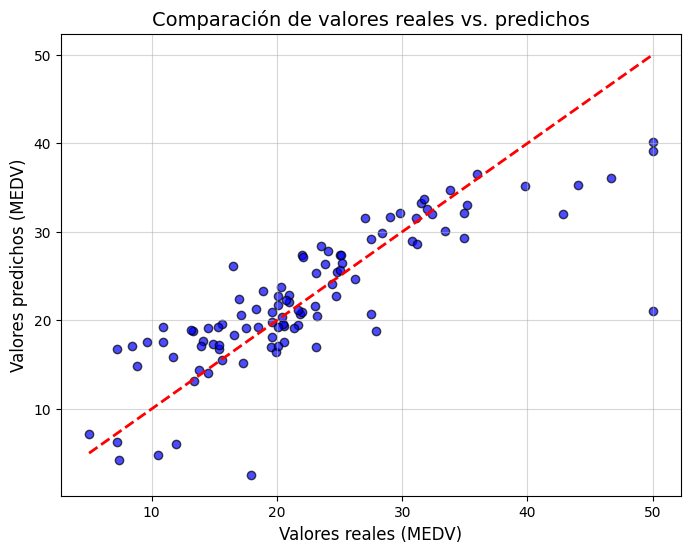

In [11]:
# Dibujamos la comparación entre los valores reales y los predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Comparación de valores reales vs. predichos', fontsize=14)
plt.xlabel('Valores reales (MEDV)', fontsize=12)
plt.ylabel('Valores predichos (MEDV)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


El gráfico muestra una alineación aceptable entre los valores reales y predichos, aunque hay cierta dispersión, especialmente en los extremos de los valores reales. 

Ahora implementaré un modelo con regularización (Ridge) y probaré diferentes valores del hiperparámetro $\alpha$ para evaluar si mejora el rendimiento.

In [14]:
from sklearn.linear_model import Ridge

# Testeamos diferentes valores de alpha para Ridge regression
alphas = [0.1, 1, 10]
ridge_results = {}

for alpha in alphas:
    # Inicializamos el modelo Ridge y lo entrenamos
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    
    # Hacemos predicciones sobre el conjunto de testing
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    
    # Evaluamos el modelo
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    # Guardamos los resultados
    ridge_results[alpha] = {
        "MAE": mae_ridge,
        "MSE": mse_ridge,
        "RMSE": rmse_ridge,
        "R2": r2_ridge
    }

# Mostramos los resultados de la regularización Ridge
ridge_results_df = pd.DataFrame(ridge_results).T

ridge_results_df


,MAE,MSE,RMSE,R2
0.1,3.673887,28.567525,5.344860,0.684693
1.0,3.673197,28.596058,5.347528,0.684378
10.0,3.666809,28.863834,5.372507,0.681422


### Valoración de los Resultados Obtenidos

#### Modelo de Regresión Lineal Clásico
El modelo de regresión lineal clásico muestra un rendimiento razonable, con las siguientes métricas principales:

- **MAE (Error absoluto medio):** 3.67
- **MSE (Error cuadrático medio):** 28.56
- **RMSE (Raíz del error cuadrático medio):** 5.34
- **$R^2$ (Coeficiente de determinación):** 0.68

Estos resultados indican que el modelo es capaz de explicar aproximadamente el 68% de la varianza en los valores de la variable target (**`MEDV`**). Sin embargo, hay cierta dispersión en las predicciones, especialmente en los extremos de los valores reales.

#### Modelo con Regularización (Ridge)
Se probaron diferentes valores para el hiperparámetro $\alpha$ en el modelo Ridge.

#### Conclusiones Generales
1. **Resultados similares independientemente de α:** Los resultados obtenidos son muy similares entre los diferentes valores de α probados, lo que indica que el modelo no es extremadamente sensible a la regularización en este caso.
2. **Limitaciones del modelo:** Aunque el R² indica un rendimiento aceptable, queda espacio para mejoras en la capacidad predictiva. Esto podría lograrse explorando técnicas avanzadas, como modelos no lineales o incorporando nuevas características.

Para mejorar el modelo, probablemente habría que valorar las siguientes alternativas:

- **Explorar métodos no lineales:** Si se desea un rendimiento significativamente mejor, podría considerarse un modelo como Random Forest, Gradient Boosting o redes neuronales.
- **Validación cruzada:** Implementar validación cruzada podría ser útil para garantizar la robustez del modelo.